# Problem-Based Learning (PBL)
# Kasus: Peningkatan Kualitas Pelayanan di Restoran Menggunakan Big Data
# kelompok: 3

# 1. Pengumpulan Data (Data Collection)

In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('Balaji Fast Food Sales.csv')
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


# 2. Pembersihan Data (Data Cleaning)

In [27]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # standardize column names
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [28]:
df.isnull().sum() 

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [29]:
df['transaction_type'].value_counts()

transaction_type
Cash      476
Online    417
Name: count, dtype: int64

In [30]:
# Handle missing values by filling with suitable defaults or dropping rows
df['transaction_type'].fillna('Unknown', inplace=True)

C:\Users\IMRAN\AppData\Local\Temp\ipykernel_48984\340763585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_type'].fillna('Unknown', inplace=True)


In [31]:
df.info()
print('---------------')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    1000 non-null   object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
---------------
          order_id   item_price     quantity  transaction_amount
count  1000.000000  1000.000000  1000.000000         1000.000000
mean    500.500000    33.315000     8.162000          275.230000
std     288.819436    14.921744     4.413075          20

* The data contains values from April 2022 to March 2023.
* The cheapest item is 20 and the most expensive item is 60 whilst the average price per item is 33.32.
* The least spent on a transaction is 20 whilst the most spent is 900. The least quantity sold per transaction is 1 whilst the most quantity sold is 15. The average transaction amount is 204.40. The average quantity sold is 8.16 per transaction.

# 4. Transformasi Data (Data Transformation)

In [36]:
# Convert 'item_price', 'quantity', and 'transaction_amount' to numeric, if necessary
df['item_price'] = pd.to_numeric(df['item_price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['transaction_amount'] = pd.to_numeric(df['transaction_amount'], errors='coerce')


In [37]:
# Check for and remove duplicates
data.drop_duplicates(inplace=True)

C:\Users\IMRAN\AppData\Local\Temp\ipykernel_48984\1677456640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [38]:
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.strftime('%b %Y')

In [39]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,month,year,month_year
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night,Jul,2022,Jul 2022
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,Aug,2022,Aug 2022
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,Nov,2022,Nov 2022
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,Feb,2023,Feb 2023
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,Oct,2022,Oct 2022


# 5. Analisis Data (Data Analysis)

Empty DataFrame
Columns: [time_of_sale, order_id]
Index: []
----------------
Empty DataFrame
Columns: [received_by, order_id]
Index: []
transaction_type
Cash       476
Online     417
Unknown    107
Name: count, dtype: int64


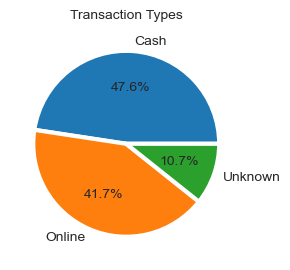

In [40]:
#lets inspect the rows contains null values to see if there is a pattern 
df_null = df[df['transaction_type'].isna()]
print(df_null.groupby('time_of_sale')['order_id'].count().reset_index())
print('----------------')
print(df_null.groupby('received_by')['order_id'].count().reset_index())

# there seems to be no particular pattern among the null values in the transaction_amount column. 
# we will treat null values as its own category thus replace the null values with 'unknown'

df['transaction_type'] = df['transaction_type'].fillna('Unknown')
transaction_type = df['transaction_type'].value_counts()
print(transaction_type)

fig, ax = plt.subplots(figsize=(3, 3))

ax.pie(transaction_type, labels=transaction_type.index, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax.set_title('Transaction Types', fontsize=10)
plt.tight_layout()

* The Restaurant has three types of transactions; Cash, Online, and Card. Cash transactions are the most common, accounting for 50.5% of all transactions, followed by Online transactions at 29.5%, and Card transactions at 20.0%.

In [41]:
df[['item_name', 'item_price']].drop_duplicates().sort_values('item_price', ascending=False).reset_index(drop=True)

,item_name,item_price
0,Sandwich,60
1,Frankie,50
2,Cold coffee,40
3,Sugarcane juice,25
4,Aalopuri,20
5,Vadapav,20
6,Panipuri,20


* The most expensive item on the menu is sandwich and its price is 60. The least expensive items on the menu are vadapav, aalopuri, and panipuri and their price is 20. The average price per item is 33.32.

In [43]:
total_sales_by_item = df.groupby('item_name')['transaction_amount'].sum().reset_index()
print(total_sales_by_item)

         item_name  transaction_amount
0         Aalopuri               20880
1      Cold coffee               54440
2          Frankie               57500
3         Panipuri               24520
4         Sandwich               65820
5  Sugarcane juice               31950
6          Vadapav               20120


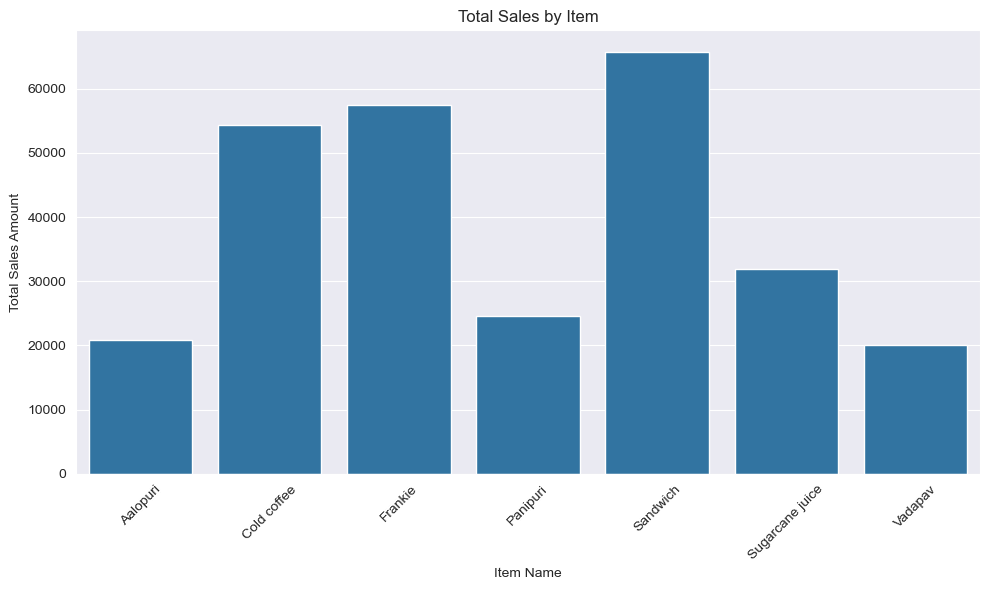

In [45]:
# Total Sales by Item
plt.figure(figsize=(10, 6))
sns.barplot(x='item_name', y='transaction_amount', data=total_sales_by_item)
plt.title('Total Sales by Item')
plt.xlabel('Item Name')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The highest sales are from sandwich, cold coffee, and frankie. The lowest sales are from vadapav, aalopuri, and sugarcane juice. 

         item_name  quantity
1      Cold coffee      1361
5  Sugarcane juice      1278
3         Panipuri      1226
2          Frankie      1150
4         Sandwich      1097
0         Aalopuri      1044
6          Vadapav      1006


C:\Users\IMRAN\AppData\Local\Temp\ipykernel_48984\2701491662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(items_quantity, x='item_name', y='quantity', palette='RdYlGn')


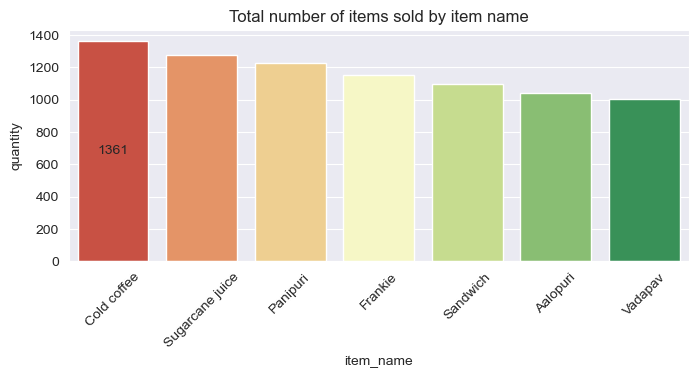

In [46]:
# top performing items
items_quantity = df.groupby('item_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)
print(items_quantity)
plt.figure(figsize=(8,3))
ax = sns.barplot(items_quantity, x='item_name', y='quantity', palette='RdYlGn')
ax.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Total number of items sold by item name')
plt.show()

* High performing products are cold coffee, sugarcane juice, and panipuri. Low performing products are vadapav, aalopuri, and sandwich, which are sold the least. 

In [44]:
sales_trend = df.groupby('date')['transaction_amount'].sum().reset_index()
print(sales_trend)

          date  transaction_amount
0   2022-04-01                 420
1   2022-04-02                1500
2   2022-04-03                 480
3   2022-04-04                2500
4   2022-04-05                 100
..         ...                 ...
343 2023-03-25                 840
344 2023-03-26                 280
345 2023-03-27                1040
346 2023-03-29                1080
347 2023-03-30                 350

[348 rows x 2 columns]


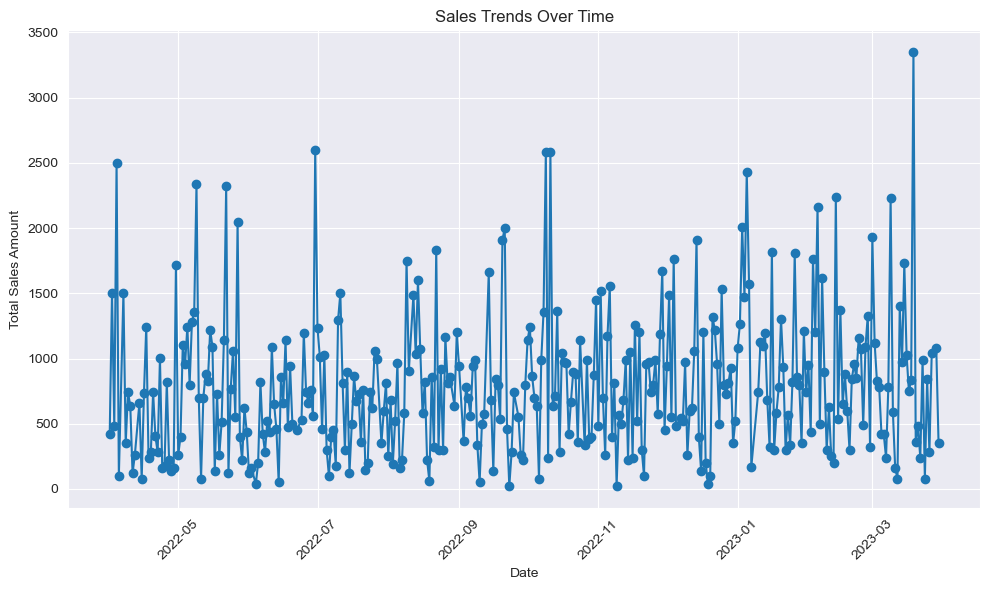

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['date'], sales_trend['transaction_amount'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The sales trend shows a general increase in sales over time, with some fluctuations, particularly in the months of August and December.

In [14]:
pd.pivot_table(df, columns='time_of_sale', index='item_name', values='order_id', aggfunc='count')

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
item_name,,,,,
Aalopuri,29,19,33,27,26
Cold coffee,34,30,26,32,39
Frankie,31,29,22,23,34
Panipuri,28,36,31,29,26
Sandwich,19,29,26,25,30
Sugarcane juice,41,32,28,25,27
Vadapav,23,26,33,29,23


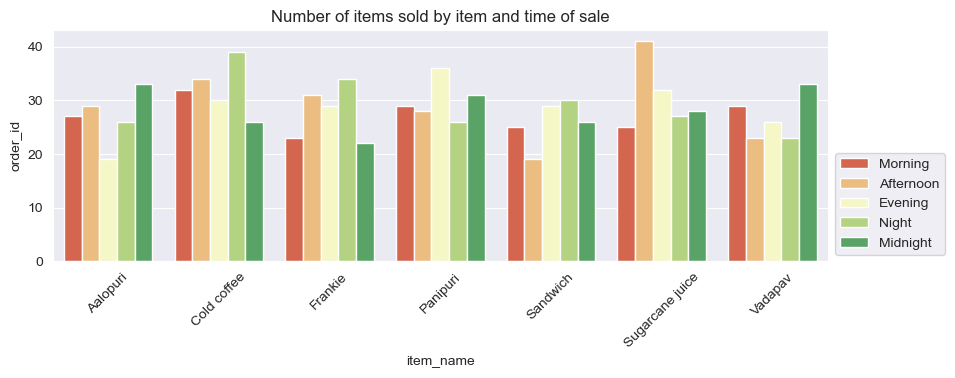

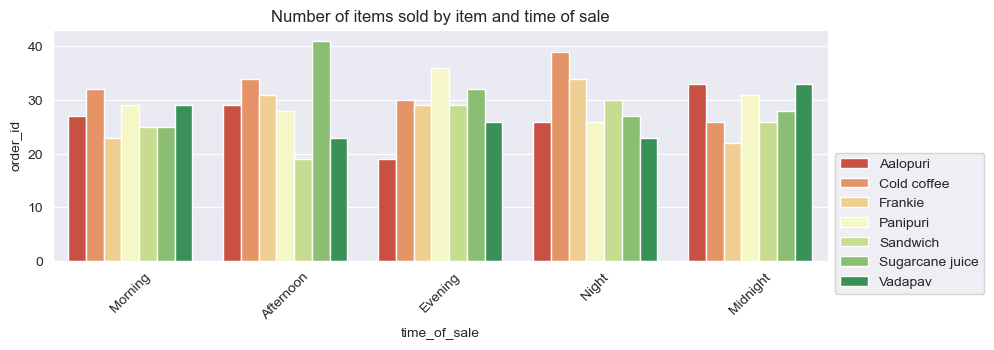

In [15]:
items_by_time = df.groupby(['item_name', 'time_of_sale'])['order_id'].count().reset_index()

plt.figure(figsize=(10,3))
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
sns.barplot(items_by_time, x='item_name', y='order_id', hue='time_of_sale',palette='RdYlGn',hue_order=order)
plt.title('Number of items sold by item and time of sale')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,3))
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
sns.barplot(items_by_time, x='time_of_sale', y='order_id', hue='item_name',palette='RdYlGn', order=order)
plt.title('Number of items sold by item and time of sale')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

* The most selling items in the morning are cold coffee, panipuri, and vadapav. 
* The most selling items in the afternoon are sugarcane juice, cold coffee, and frankie. 
* The most selling items in the evening are panipuri, sugarcane juice, and cold coffee. 
* The most selling items at night are cold coffee, frankie, and sandwich. 
* The most selling items at midnight are aalopuri, vadapav, and panipuri.

C:\Users\IMRAN\AppData\Local\Temp\ipykernel_48984\2681506652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df, x='time_of_sale', palette='RdYlGn')


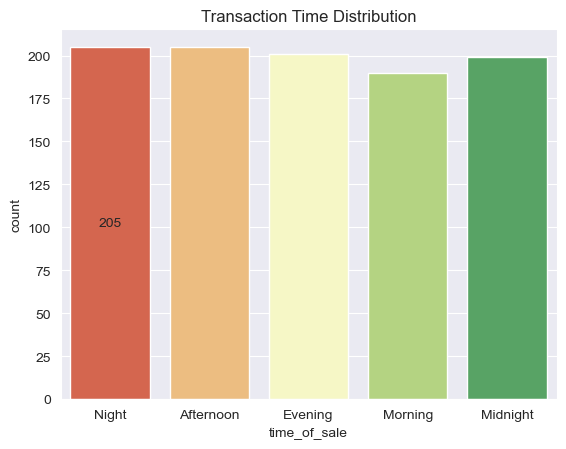

In [48]:
ax = sns.countplot(df, x='time_of_sale', palette='RdYlGn')
plt.title('Transaction Time Distribution')

ax.bar_label(ax.containers[0],label_type='center')
plt.show()

* The number of transactions is highest in the evening and lowest at midnight, with a peak at night.

C:\Users\IMRAN\AppData\Local\Temp\ipykernel_48984\4177435253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(avg_transaction_timeofsale, x='time_of_sale', y='transaction_amount',palette='RdYlGn')


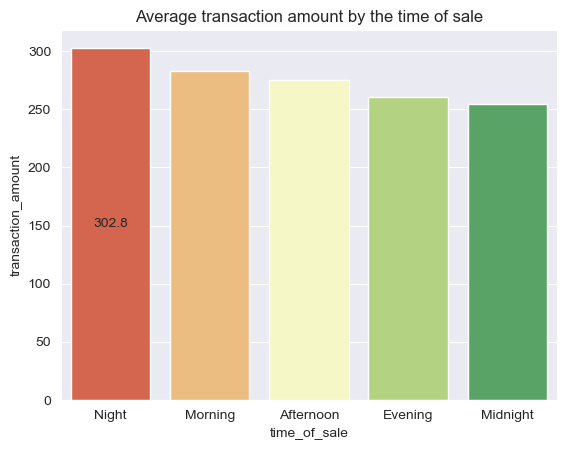

In [51]:
avg_transaction_timeofsale = df.groupby('time_of_sale')['transaction_amount'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(avg_transaction_timeofsale, x='time_of_sale', y='transaction_amount',palette='RdYlGn')
plt.title('Average transaction amount by the time of sale')

ax.bar_label(ax.containers[0],label_type='center',fmt='%.1f')
plt.show()

* Most expensive item on the menu is sandwich and its price is 60. Least expensive item on the menu is vadapav, aalopuri and panipuri and their price is 20.
* High performing products are cold coffee, sugarcane juice and panipuri. Low performing products are vadapav, aalopuri and sandwich.
* Cold coffee sales peak at night and drop the lowest at midnight.
* Time of sale analysis;
    * Most selling items in the morning are cold coffee, panipuri and vadapav. 
    * Most selling items in the afternoon are sugarcane juice, cold coffee and frankie. 
    * Most selling items in the evening are panipuri, sugarcane juice and cold coffee. 
    * Most selling items at night are cold coffee, frankie and sandwich. 
    * Most selling items at midnight are aalopuri, vadapav and panipuri. 
    * The average transaction amount was higher at night compared than the other times of sale whilst at midnight it was lowest.

In [52]:
# online transactions
online_transactions = df[df['transaction_type']=='Online']
online_transactions['time_of_sale'].value_counts()

time_of_sale
Night        90
Afternoon    90
Evening      82
Midnight     79
Morning      76
Name: count, dtype: int64

* Online transactions are highest in the afternoon and lowest at midnight.
* Cash transactions are highest in the evening and lowest at midnight.
* Card transactions are highest in the evening and lowest at midnight.

In [53]:
pd.pivot_table(df, columns='time_of_sale', index='transaction_type', values='order_id', aggfunc='count')

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
transaction_type,,,,,
Cash,91,103,98,92,92
Online,90,82,79,76,90
Unknown,24,16,22,22,23


* There is an increase in online sales in the afternoon and at night.
* Cash transactions increased in the evening.

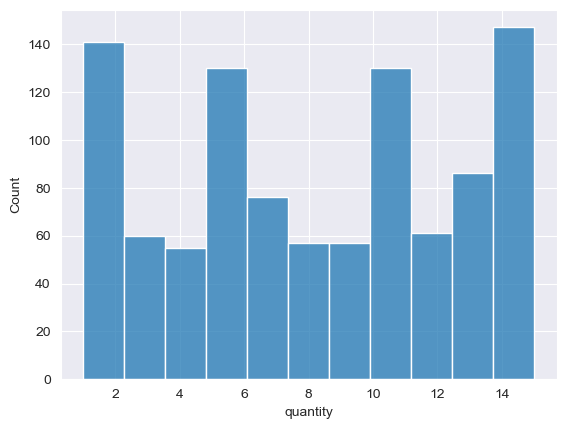

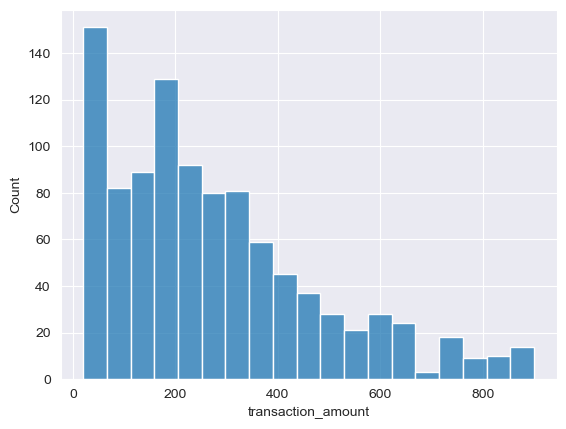

In [54]:
sns.histplot(df['quantity'])
plt.show()
sns.histplot(df['transaction_amount'])
plt.show()

* The quantity sold per transaction ranges from 1 to 15, with an average of 8.16.
* The transaction amount ranges from 20 to 900, with an average of 204.40.
* The distribution of quantity sold per transaction is right-skewed, with most transactions involving higher quantities.
* The distribution of transaction amount is right-skewed, with most transactions having lower amounts.

# 6. Time Series Analysis (Analisis Deret Waktu)

Model evaluation:
MAE: 1511.91
MSE: 2906718.66
RMSE: 1704.91
R²: 0.32
Model evaluation:
MAE: 1828.61
MSE: 5278562.67
RMSE: 2297.51
R²: 0.18


C:\Users\IMRAN\AppData\Local\Temp\ipykernel_48984\1083982530.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year'] = pd.to_datetime(df['month_year'])


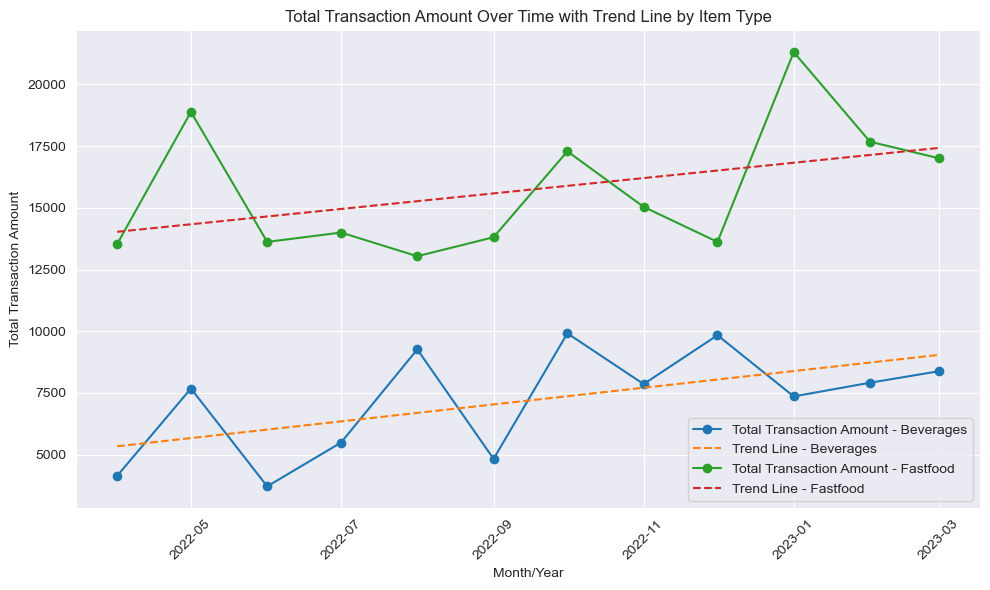

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'month_year' to datetime format
df['month_year'] = pd.to_datetime(df['month_year'])

# Group by 'month_year' and sum 'transaction_amount' for each 'item_type'
total_transaction_per_month = df.groupby(['month_year', 'item_type'])['transaction_amount'].sum().reset_index()

# Convert 'month_year' to ordinal values for regression
total_transaction_per_month['month_year_ordinal'] = total_transaction_per_month['month_year'].apply(lambda x: x.toordinal())

# Perform linear regression for each item type
plt.figure(figsize=(10, 6))

# to plot two trend lines iterate through each item type

for item_type in total_transaction_per_month['item_type'].unique():
    # Filter data for current item type
    data = total_transaction_per_month[total_transaction_per_month['item_type'] == item_type]
    
    # reshape filtered data into a 2-dimensional array ((-1, 1)), which is necessary for input to the LinearRegression model
    X = data['month_year_ordinal'].values.reshape(-1, 1)
    y = data['transaction_amount'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f'Model evaluation:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}')
    
    # Plot data and trend line for current item type
    plt.plot(data['month_year'], data['transaction_amount'], marker='o', linestyle='-', label=f'Total Transaction Amount - {item_type}')
    plt.plot(data['month_year'], y_pred, linestyle='--', label=f'Trend Line - {item_type}')

plt.xlabel('Month/Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount Over Time with Trend Line by Item Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Performance:
The R² scores of 0.32 and 0.18 are relatively low, indicating that the model does not explain much of the variance in the transaction amount. This suggests that the linear relationship between the date and transaction amount might not be strong. The MAE, MSE, and RMSE values are quite high, which indicates significant prediction errors. Possible Reasons for Poor Performance:
Non-Linearity: The relationship between month_year and transaction_amount may not be linear. Other patterns or trends might be present that a linear model cannot capture. Missing Features: Other features (e.g., seasonality, promotions, economic factors) might influence the transaction amount and are not included in the model.|

* The R² scores of 0.32 and 0.18 are relatively low, indicating that the model does not explain much of the variance in the transaction amount. This suggests that the linear relationship between the date and transaction amount might not be strong.
* The MAE, MSE, and RMSE values are quite high, which indicates significant prediction errors.
* Possible Reasons for Poor Performance:
    * Non-Linearity: The relationship between month_year and transaction_amount may not be linear. Other patterns or trends might be present that a linear model cannot capture.
    * Missing Features: Other features (e.g., seasonality, promotions, economic factors) might influence the transaction amount and are not included in the model.
* The total transaction amount for each item type is plotted over time, along with a trend line showing the linear relationship between the date and transaction amount. The trend lines indicate a slight increase in transaction amounts over time for each item type.
* The trend lines show a slight increase in transaction amounts over time for each item type, but the model does not explain much of the variance in the transaction amount. This suggests that other factors or patterns might influence the transaction amount that are not captured by the linear model.

# 

# 7. Kesimpulan (Conclusion)

* The Restaurant has three types of transactions; Cash, Online, and Card. Cash transactions are the most common, accounting for 50.5% of all transactions, followed by Online transactions at 29.5%, and Card transactions at 20.0%.
* The most expensive item on the menu is sandwich and its price is 60. The least expensive items on the menu are vadapav, aalopuri, and panipuri and their price is 20. The average price per item is 33.32.
* The highest sales are from sandwich, cold coffee, and frankie. The lowest sales are from vadapav, aalopuri, and sugarcane juice.
* The most selling items in the morning are cold coffee, panipuri, and vadapav. The most selling items in the afternoon are sugarcane juice, cold coffee, and frankie. The most selling items in the evening are panipuri, sugarcane juice, and cold coffee. The most selling items at night are cold coffee, frankie, and sandwich. The most selling items at midnight are aalopuri, vadapav, and panipuri.
* The number of transactions is highest in the evening and lowest at midnight, with a peak at night.
* The average transaction amount was higher at night compared than the other times of sale whilst at midnight it was lowest.
* Online transactions are highest in the afternoon and lowest at midnight.
* Cash transactions are highest in the evening and lowest at midnight.
* Card transactions are highest in the evening and lowest at midnight.
* The quantity sold per transaction ranges from 1 to 15, with an average of 8.16.
* The transaction amount ranges from 20 to 900, with an average of 204.40.
* The distribution of quantity sold per transaction is right-skewed, with most transactions involving higher quantities.
* The distribution of transaction amount is right-skewed, with most transactions having lower amounts.
* The total transaction amount for each item type is plotted over time, along with a trend line showing the linear relationship between the date and transaction amount. The trend lines indicate a slight increase in transaction amounts over time for each item type.
* The R² scores of 0.32 and 0.18 are relatively low, indicating that the model does not explain much of the variance in the transaction amount. This suggests that the linear relationship between the date and transaction amount might not be strong.
* The MAE, MSE, and RMSE values are quite high, which indicates significant prediction errors.
* Possible Reasons for Poor Performance:
* Non-Linearity: The relationship between month_year and transaction_amount may not be linear. Other patterns or trends might be present that a linear model cannot capture.
* Missing Features: Other features (e.g., seasonality, promotions, economic factors) might influence the transaction amount and are not included in the model.  
* The trend lines show a slight increase in transaction amounts over time for each item type, but the model does not explain much of the variance in the transaction amount. This suggests that other factors or patterns might influence the transaction amount that are not captured by the linear model.
* The Restaurant can use these insights to optimize its menu, pricing, and sales strategies to improve customer satisfaction and increase revenue.


# 8. Saran (Recommendation)

* The Restaurant can consider promoting high-performing products like cold coffee, sugarcane juice, and panipuri to increase sales further.
* The Restaurant can analyze the performance of low-selling items like vadapav, aalopuri, and sandwich to identify opportunities for improvement or replacement.
* The Restaurant can optimize its sales strategies based on the time of sale analysis, such as offering discounts on popular items during peak hours or promoting specific products during slower times.
* The Restaurant can explore other factors that might influence sales, such as seasonality, promotions, or economic conditions, to develop more accurate sales forecasts and strategies.
* The Restaurant can leverage online transaction data to enhance its online ordering platform, improve customer experience, and increase online sales.
* The Restaurant can use the time series analysis results to develop more sophisticated forecasting models that capture the non-linear relationships and other factors influencing sales.
* The Restaurant can continue to monitor sales trends, customer preferences, and market conditions to adapt its menu, pricing, and sales strategies to meet changing customer needs and preferences.
* The Restaurant can invest in staff training, customer service, and quality control to enhance the overall dining experience and increase customer loyalty and retention.
* The Restaurant can explore partnerships, collaborations, or marketing campaigns to attract new customers, expand its customer base, and increase brand awareness and visibility.
* The Restaurant can collect feedback, reviews, and suggestions from customers to identify areas for improvement, address customer concerns, and enhance the overall dining experience.
* The Restaurant can use data analytics, business intelligence, and machine learning tools to gain deeper insights, make data-driven decisions, and optimize its operations, marketing, and sales strategies.
* The Restaurant can benchmark its performance against industry standards, competitors, and best practices to identify opportunities for improvement, innovation, and growth.